<a href="https://colab.research.google.com/github/FiII04/QLC240_rng/blob/main/Exercise9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Exercise 9: Importing and initial visualization of data that we will be modeling

The following exercises will be organized into 4 sections:
    1. Comparing the 2 datasets (JMA, Argo) and looking at overlaps and gaps.
    2. Creating models to find the best fit model for the JMA dataset, to use on the ARGO data.
    3. Use only data from JMA that corresponds to the geographic area of the ARGO dataset. Then do the same thing as in section 2.
    4. Analysis of the best fit models from sections 2 and 3, to see if using data from the same geographic area results in a better model.

In [15]:
#Import packages needed to run code
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

Import the JMA dataset and visualize to see what we have.
IMport nitrate file as a pandas dataset.

In [20]:
#Import packages needed to run code
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import io
import requests


# URL of the CSV file on GitHub
url = "https://raw.githubusercontent.com/seina001/QLC240_Spring2025/main/jma_nitrate.csv"

# Fetch the content of the CSV file
try:
    response = requests.get(url)
    response.raise_for_status()  # Raise an exception for bad status codes (4xx or 5xx)

    # Read the CSV content into a pandas DataFrame
    data = pd.read_csv(io.StringIO(response.text))

    # Remove the "Unnamed" column if it exists
    if 'Unnamed: 0' in data.columns:
        data = data.drop(columns=['Unnamed: 0'])

    # Now you can work with the 'data' DataFrame as before
    print(data)

except requests.exceptions.RequestException as e:
    print(f"Error fetching data from URL: {e}")
except pd.errors.ParserError as e:
    print(f"Error parsing CSV data: {e}")

         theta      sal  depth  nitrate         lon        lat         date  \
0      25.8807  34.0215      0     0.09  140.242833  34.926167   2010/10/03   
1      25.8993  34.0217     13     0.00  140.242833  34.926167   2010/10/03   
2      25.8843  34.0196     27     0.00  140.242833  34.926167   2010/10/03   
3      25.9894  34.2936     51     0.48  140.242833  34.926167   2010/10/03   
4      23.6146  34.5002     75     2.71  140.242833  34.926167   2010/10/03   
...        ...      ...    ...      ...         ...        ...          ...   
16216   2.3991  34.4053   1204    42.96  145.709167  42.662500   2016/05/11   
16217   2.2752  34.4674   1403    42.88  145.709167  42.662500   2016/05/11   
16218   2.0916  34.5120   1602    42.20  145.709167  42.662500   2016/05/11   
16219   1.9582  34.5527   1801    41.73  145.709167  42.662500   2016/05/11   
16220   1.7914  34.5919   2002    40.96  145.709167  42.662500   2016/05/11   

         year  month   day  profile  cruise        

Plotting a scater plot of nitrate and depth data from JMA cruise.
You might want to invert the axis, to make it look like an ocean water column.

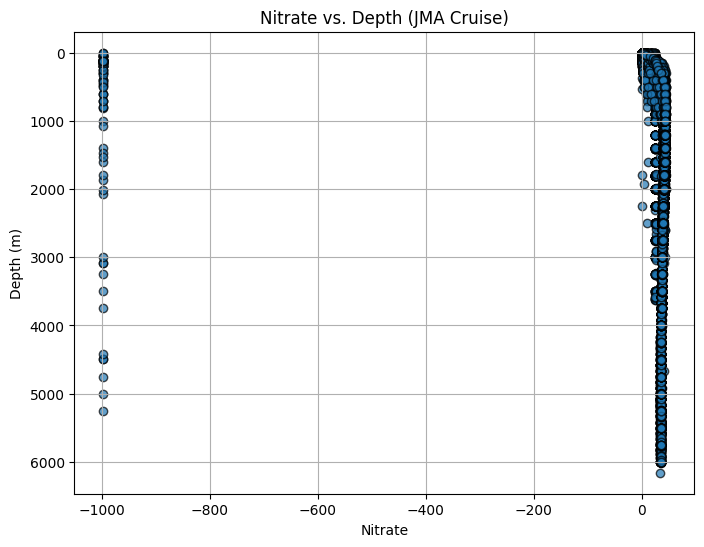

In [27]:
 # Create the scatter plot
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(data['nitrate'], data['depth'], marker='o', edgecolors='black', alpha=0.7)
plt.xlabel("Nitrate")
plt.ylabel("Depth (m)")
plt.title("Nitrate vs. Depth (JMA Cruise)")
plt.gca().invert_yaxis()  # Invert the y-axis
plt.grid(True)
plt.show()

The raw jma data appear to have some nitrate values at -999, representing either no data or bad data. These have to be removed before we can continue.

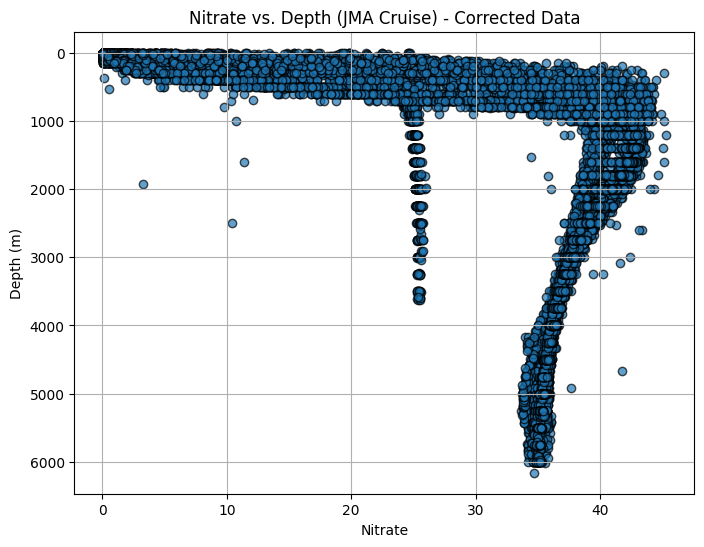

In [31]:
# Filter out rows with -999 in 'nitrate' column
corr_data = data[data['nitrate'] > 0]

# Create a scatter plot of the corrected data
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.scatter(corr_data['nitrate'], corr_data['depth'], marker='o', edgecolors='black', alpha=0.7)
plt.xlabel("Nitrate")
plt.ylabel("Depth (m)")
plt.title("Nitrate vs. Depth (JMA Cruise) - Corrected Data")
plt.gca().invert_yaxis()  # Invert the y-axis to represent ocean depth
plt.grid(True)
plt.show()

The following cell will read in another file, and fix some date/time variables so they are managable. You don't need to change it at all, except you need to upload the .csv file itself.

In [34]:
# Reading in the Argo float data with no NO3 values
infile = 'https://raw.githubusercontent.com/seina001/QLC240_Spring2025/refs/heads/main/kuro_BGCargo_noNO3.csv'
data_BGC = pd.read_csv(infile, sep = (','))

# Separating the date column of BGC argo data into year month and day columns to look at seasonality compared to the jma data.
import datetime

data_BGC['year'] = pd.DatetimeIndex(data_BGC['Date/GMT']).year
data_BGC['month'] = pd.DatetimeIndex(data_BGC['Date/GMT']).month
data_BGC['day'] = pd.DatetimeIndex(data_BGC['Date/GMT']).day
#data_BGC.head()

# Section 1, compare datasets (JMA, ARGO)

Compare the samples locations and see how the datasets overlap or don't overlap

In [ ]:
#Plot the corrected data and the Argo float data "Latitude" and "Longitude" coordinates. If you're unsure of the column to choose, just look at the data and the column head names.
#Scatter plot for example

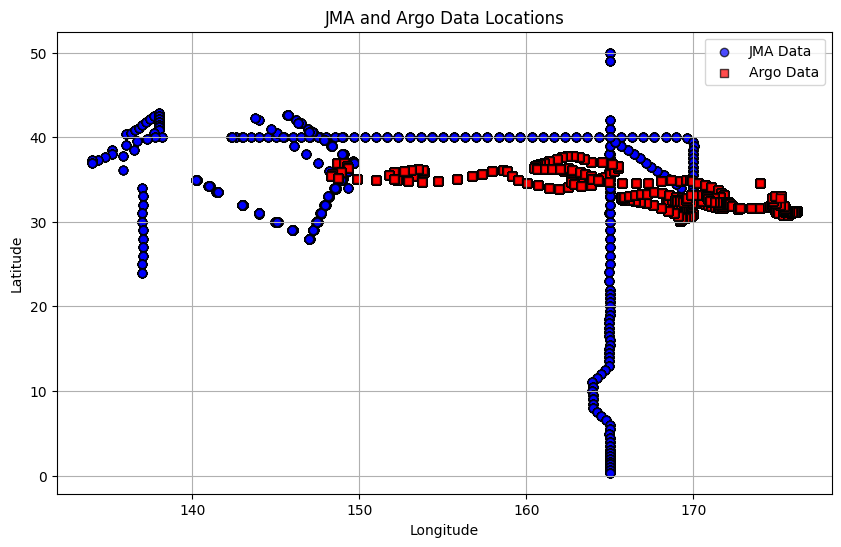

In [36]:
import matplotlib.pyplot as plt

# Assuming corr_data and data_BGC are already loaded as in your previous code

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Plot JMA data
plt.scatter(corr_data['lon'], corr_data['lat'],
            marker='o', edgecolors='black', alpha=0.7, label='JMA Data', color='blue')

# Plot Argo data
plt.scatter(data_BGC['LON'], data_BGC['LAT'],
            marker='s', edgecolors='black', alpha=0.7, label='Argo Data', color='red')

# Set plot labels and title
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("JMA and Argo Data Locations")

# Add a legend
plt.legend()

# Show the plot
plt.grid(True)
plt.show()

Just from the geographic extend, we can see that the distribution of JMA samples is considerably higher than that of BCG ARGO samples. However big this despair, for this and other variables, there is some overlap in the sampled region, depths, and seasons. The geographical extent overlaps in the region between the ~30 to ~40° of latitude and ~150 to ~175° of longitude.

Compare the water masses that were sampled in both datasets

In [ ]:
#Plot a scatter plot looking at the temperature vs depth profile, and seperate plot looking at salinity vs temperature. Each data source should be labeled differently.

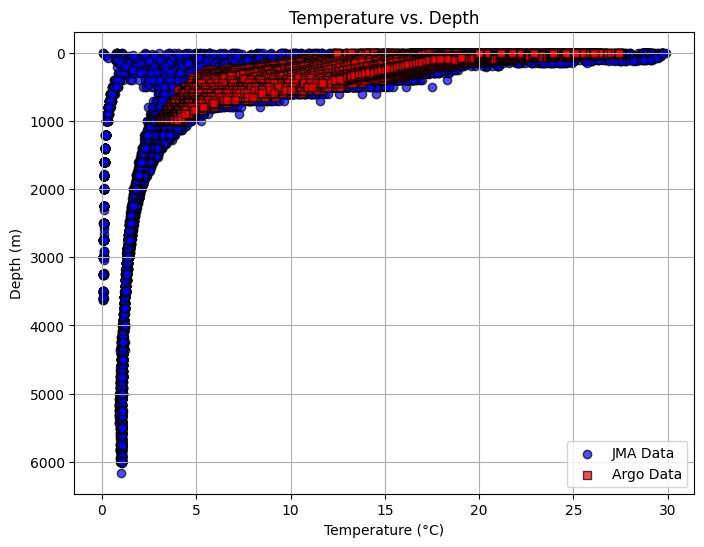

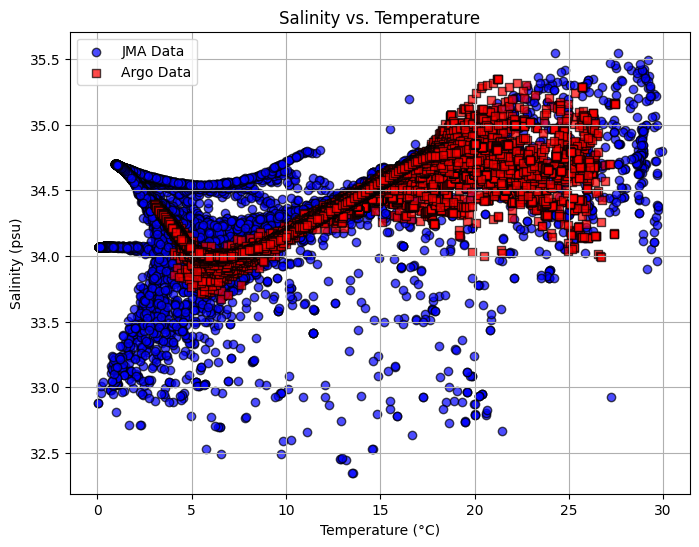

In [40]:
import matplotlib.pyplot as plt

# Temperature vs. Depth
plt.figure(figsize=(8, 6))

# JMA data
plt.scatter(corr_data['theta'], corr_data['depth'],
            marker='o', edgecolors='black', alpha=0.7, label='JMA Data', color='blue')

# Argo data
plt.scatter(data_BGC['TEMPERATURE[C]'], -1*data_BGC['DEPTH[M]'],
            marker='s', edgecolors='black', alpha=0.7, label='Argo Data', color='red')

plt.xlabel("Temperature (°C)")
plt.ylabel("Depth (m)")
plt.title("Temperature vs. Depth")
plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.legend()
plt.grid(True)
plt.show()

# Salinity vs. Temperature
plt.figure(figsize=(8, 6))

# JMA data
plt.scatter(corr_data['theta'], corr_data['sal'],
            marker='o', edgecolors='black', alpha=0.7, label='JMA Data', color='blue')

# Argo data
plt.scatter(data_BGC['TEMPERATURE[C]'], data_BGC['SALINITY[PSS]'],
            marker='s', edgecolors='black', alpha=0.7, label='Argo Data', color='red')

plt.xlabel("Temperature (°C)")
plt.ylabel("Salinity (psu)")
plt.title("Salinity vs. Temperature")
plt.legend()
plt.grid(True)
plt.show()